In [ ]:
#import the dataset, we are using a book as a dataset here --> "The verdict"

with open("the_verdict.txt", "r", encoding = "utf-8") as f:
  raw_text = f.read()

print(f"Total number of characters are: {len(raw_text)}\n")
print("First 100 characters: ")
print(raw_text[:99])

Total number of characters are: 20479

First 100 characters: 
I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no 


In [ ]:
#Splitting the text, example:
import re

text = "Hello, world. This is an example text."
result = re.split(r'(\s)', text)
print(result)

['Hello,', ' ', 'world.', ' ', 'This', ' ', 'is', ' ', 'an', ' ', 'example', ' ', 'text.']


In [ ]:
result = re.split(r'([,.]|\s)', text)
print(result)

['Hello', ',', '', ' ', 'world', '.', '', ' ', 'This', ' ', 'is', ' ', 'an', ' ', 'example', ' ', 'text', '.', '']


In [ ]:
result = [item for item in result if item.strip()]
print(result)

['Hello', ',', 'world', '.', 'This', 'is', 'an', 'example', 'text', '.']


In [ ]:
text = "Hello, this is-- an example. No? yes, buddy!, though-we have, ok?"

result = re.split(r'([,:?!._"()\']|--|\s)', text)
result = [item for item in result if item.strip()]
print(result)

['Hello', ',', 'this', 'is', '--', 'an', 'example', '.', 'No', '?', 'yes', ',', 'buddy', '!', ',', 'though-we', 'have', ',', 'ok', '?']


In [ ]:
preprocessed = re.split(r'([,:?!._"()\']|--|\s)', raw_text)
preprocessed = [item for item in preprocessed if item.strip()]
print(preprocessed[:30])

['I', 'HAD', 'always', 'thought', 'Jack', 'Gisburn', 'rather', 'a', 'cheap', 'genius', '--', 'though', 'a', 'good', 'fellow', 'enough', '--', 'so', 'it', 'was', 'no', 'great', 'surprise', 'to', 'me', 'to', 'hear', 'that', ',', 'in']


In [ ]:
print(len(preprocessed))

4669


In [ ]:
all_words = sorted(set(preprocessed))
vocab_size = len(all_words)

print(vocab_size)

1143


In [ ]:
vocab = {token: integer for integer, token in enumerate(all_words)}

In [ ]:
for i, item in enumerate(vocab.items()):
  print(item)
  if i>=10:
    break

('!', 0)
('"', 1)
("'", 2)
('(', 3)
(')', 4)
(',', 5)
('--', 6)
('.', 7)
(':', 8)
(';', 9)
('?', 10)


In [ ]:
class SimpleTokenizerV1:
  def __init__(self, vocab):
    self.str_to_int = vocab
    self.int_to_str = {i:s for s,i in vocab.items()}

  def encode(self, text):
    preprocessed = re.split(r'([,:?!._"()\']|--|\s)', text)
    preprocessed = [item.strip() for item in preprocessed if item.strip()]

    ids = [self.str_to_int[s] for s in preprocessed]
    return ids

  def decode(self, ids):
    text = " ".join([self.int_to_str[i] for i in ids])
    text = re.sub(r'\s+([,.:;?!()\'"\[\]])', r'\1', text)

    return text

In [ ]:
tokenizer = SimpleTokenizerV1(vocab)

text = """It's the last he painted, you know,"
          Mrs. Gisburn said with pardonable pride."""

ids = tokenizer.encode(text)
print(ids)

[57, 2, 861, 999, 610, 538, 754, 5, 1139, 603, 5, 1, 68, 7, 39, 862, 1121, 764, 803, 7]


In [ ]:
string = tokenizer.decode(ids)
print(string)

It' s the last he painted, you know," Mrs. Gisburn said with pardonable pride.


In [ ]:
string = "hello, how are you"
try:
  # The encode method expects a string as input, so this should work
  encoded_string = tokenizer.encode(string)
  print(f"Encoded string: {encoded_string}")
except Exception as e:
  print(f"Error is: {e}")

Error is: 'hello'


In [ ]:
all_tokens = sorted(list(set(preprocessed)))
all_tokens.extend(["<|endoftext|>", "<|unk|>"])

vocab = {token : integer for integer,token in enumerate(all_tokens)}

In [ ]:
len(vocab.items())

1145

In [ ]:
for i,item in enumerate(list(vocab.items())[-5:]):
  print(item)

('younger', 1140)
('your', 1141)
('yourself', 1142)
('<|endoftext|>', 1143)
('<|unk|>', 1144)


In [ ]:
class SimpleTokenizerV2          :
  def __init__(self, vocab):
    self.str_to_int = vocab
    self.int_to_str = {i:s for s,i in vocab.items()}

  def encode(self, text):
    preprocessed = re.split(r'([,:?!._"()\']|--|\s)', text)
    preprocessed = [item.strip() for item in preprocessed if item.strip()]
    preprocessed = [
        item if item in self.str_to_int
        else "<|unk|>" for item in preprocessed
    ]

    ids = [self.str_to_int[s] for s in preprocessed]
    return ids

  def decode(self, ids):
    text = " ".join([self.int_to_str[i] for i in ids])
    text = re.sub(r'\s+([,.:;?!()\'"\[\]])', r'\1', text)

    return text

In [ ]:
tokenizer = SimpleTokenizerV2(vocab)

text1 = "Hello, how are you?"
text2 = "In the sulit terraces of the palace."

text = " <|endoftext|> ".join((text1, text2))
print(text)

Hello, how are you? <|endoftext|> In the sulit terraces of the palace.


In [ ]:
tokenizer.encode(text)

[1144, 5, 566, 172, 1139, 10, 1143, 56, 999, 1144, 995, 730, 999, 1144, 7]

In [ ]:
tokenizer.decode(tokenizer.encode(text))

'<|unk|>, how are you? <|endoftext|> In the <|unk|> terraces of the <|unk|>.'

# Byte pair encoding

In [ ]:
!pip install tiktoken

In [ ]:
import importlib
import tiktoken

importlib.metadata.version("tiktoken")

'0.9.0'

In [ ]:
tokenizer = tiktoken.get_encoding("gpt2")

In [ ]:
text = (
    "Hello, how are you? <|endoftext|> In the sulit terraces of the palace."
    "of someunknowplace."
)

integers = tokenizer.encode(text, allowed_special={"<|endoftext|>"})

print(integers)

[15496, 11, 703, 389, 345, 30, 220, 50256, 554, 262, 33154, 270, 8812, 2114, 286, 262, 20562, 13, 1659, 617, 2954, 2197, 5372, 13]


In [ ]:
decode = tokenizer.decode(integers)
print(decode)

Hello, how are you? <|endoftext|> In the sulit terraces of the palace.of someunknowplace.


# Creating Input Target Pairs

In [ ]:
with open("the_verdict.txt", "r", encoding="utf-8") as f:
  raw_text = f.read()

enc_text = tokenizer.encode(raw_text)
print(len(enc_text))

5145


In [ ]:
enc_sample = enc_text[50:]

In [ ]:
context_size = 4

X = enc_sample[:context_size]
y = enc_sample[1:context_size]

print(f"X: {X}")
print(f"y:      {y}")

X: [290, 4920, 2241, 287]
y:      [4920, 2241, 287]


In [ ]:
for i in range(1, context_size+1):
  input = enc_sample[:i]
  desired = enc_sample[i]

  print(f"{input} ---> {desired}")

[290] ---> 4920
[290, 4920] ---> 2241
[290, 4920, 2241] ---> 287
[290, 4920, 2241, 287] ---> 257


In [ ]:
for i in range(1, context_size+1):
  input = enc_sample[:i]
  desired = enc_sample[i]

  print(f"{tokenizer.decode(input)} ---> {tokenizer.decode([desired])}")   #Note that the desired is in list, this is because the decoder is expecting a list of integers not a single integer so it even a single word has to be passed by the list


 and --->  established
 and established --->  himself
 and established himself --->  in
 and established himself in --->  a


In [ ]:
import torch

In [ ]:
from torch.utils.data import Dataset, DataLoader

class GPTDatasetV1(Dataset):
  def __init__(self, txt, tokenizer, max_length, stride):
    self.input_ids = []
    self.target_ids = []

    token_ids = tokenizer.encode(txt, allowed_special = {"<|endoftext|>"})

    for i in range(0, len(token_ids)- max_length, stride):
      input_chunk = token_ids[i:i + max_length]
      target_chunk = token_ids[i+1: i + max_length + 1]

      self.input_ids.append(torch.tensor(input_chunk))
      self.target_ids.append(torch.tensor(target_chunk))

  def __len__(self):
    return len(self.input_ids)

  def __getitem__(self, idx):
    return self.input_ids[idx], self.target_ids[idx]


In [ ]:
def create_dataloader_v1(txt, batch_size=4, max_length = 256,
                         stride = 256, shuffle= True, drop_last = True,
                         num_workers = 0):

  tokenizer = tiktoken.get_encoding("gpt2")

  dataset = GPTDatasetV1(txt, tokenizer, max_length, stride)

  dataloader = DataLoader(
      dataset,
      batch_size = batch_size,
      shuffle = shuffle,
      drop_last = drop_last,
      num_workers = num_workers
  )

  return dataloader

In [ ]:
with open("the_verdict.txt", "r", encoding="utf-8") as f:
  raw_text = f.read()

In [ ]:
import torch

dataloader = create_dataloader_v1(
    raw_text, batch_size = 1, max_length= 4, stride = 1, shuffle = False
)

data_iter = iter(dataloader)
first_batch = next(data_iter)
second_batch = next(data_iter)
print(first_batch)
print(second_batch)

[tensor([[  40,  367, 2885, 1464]]), tensor([[ 367, 2885, 1464, 1807]])]
[tensor([[ 367, 2885, 1464, 1807]]), tensor([[2885, 1464, 1807, 3619]])]


In [ ]:
dataloader = create_dataloader_v1(
    raw_text, batch_size = 8, max_length= 4, stride = 4, shuffle = False
)

data_iter = iter(dataloader)
inputs, targets = next(data_iter)

print(f"Inputs:\n{inputs}")
print(f"Inputs:\n{targets}")


Inputs:
tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])
Inputs:
tensor([[  367,  2885,  1464,  1807],
        [ 3619,   402,   271, 10899],
        [ 2138,   257,  7026, 15632],
        [  438,  2016,   257,   922],
        [ 5891,  1576,   438,   568],
        [  340,   373,   645,  1049],
        [ 5975,   284,   502,   284],
        [ 3285,   326,    11,   287]])


# Creating Embedding Tokens (Vector representation of word)

In [ ]:
input_ids = torch.tensor([2, 3, 1, 5])

In [ ]:
vocab_size = 6
output_dim = 3

torch.manual_seed(123)
embedding_layer = torch.nn.Embedding(vocab_size, output_dim)

In [ ]:
print(embedding_layer.weight)

Parameter containing:
tensor([[ 0.3374, -0.1778, -0.1690],
        [ 0.9178,  1.5810,  1.3010],
        [ 1.2753, -0.2010, -0.1606],
        [-0.4015,  0.9666, -1.1481],
        [-1.1589,  0.3255, -0.6315],
        [-2.8400, -0.7849, -1.4096]], requires_grad=True)


In [ ]:
print(embedding_layer(torch.tensor(3)))

tensor([-0.4015,  0.9666, -1.1481], grad_fn=<EmbeddingBackward0>)


In [ ]:
print(embedding_layer(input_ids))

tensor([[ 1.2753, -0.2010, -0.1606],
        [-0.4015,  0.9666, -1.1481],
        [ 0.9178,  1.5810,  1.3010],
        [-2.8400, -0.7849, -1.4096]], grad_fn=<EmbeddingBackward0>)


# Positional Encoding (Encoding Word Positions)

In [ ]:
import torch
from torch import nn

vocab_size = 50257
dimension = 256

token_embedding_layer = torch.nn.Embedding(vocab_size,dimension)

In [ ]:
max_length = 4
dataloader = create_dataloader_v1(
    raw_text, batch_size = 8, max_length = max_length,
    stride = max_length, shuffle = False
)

data_iter = iter(dataloader)
inputs, targets = next(data_iter)

In [ ]:
print("Token IDs:\n", inputs)
print(f"Targets:\n{targets}")

Token IDs:
 tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])
Targets:
tensor([[  367,  2885,  1464,  1807],
        [ 3619,   402,   271, 10899],
        [ 2138,   257,  7026, 15632],
        [  438,  2016,   257,   922],
        [ 5891,  1576,   438,   568],
        [  340,   373,   645,  1049],
        [ 5975,   284,   502,   284],
        [ 3285,   326,    11,   287]])


In [ ]:
token_embeddings = token_embedding_layer(inputs)
print(token_embeddings.shape)

torch.Size([8, 4, 256])


In [ ]:
context_length = max_length
pos_embedding_layer = nn.Embedding(context_length, dimension )

In [ ]:
pos_embeddings = pos_embedding_layer(torch.arange(max_length))
print(pos_embeddings.shape)

torch.Size([4, 256])


In [ ]:
input_embeddings = token_embeddings + pos_embeddings
print(input_embeddings.shape)

torch.Size([8, 4, 256])


#Implementing Simplified Attention Mechanism

In [ ]:
import torch

inputs = torch.tensor(
    [[0.43, 0.15, 0.89], # Your (x^1)
     [0.55, 0.87, 0.66],
     [0.57, 0.85, 0.66],
     [0.22, 0.58, 0.33],
     [0.77, 0.25, 0.1],
     [0.05, 0.8 , 0.55]]
)

In [ ]:
query = inputs[1]

attn_scores_2 = torch.empty(inputs.shape[0])

for i, x_i in enumerate(inputs):
  attn_scores_2[i] = torch.dot(x_i, query)

print(attn_scores_2)

tensor([0.9544, 1.4950, 1.4886, 0.8434, 0.7070, 1.0865])


In [ ]:
attn_weights_2_tmp = attn_scores_2 / attn_scores_2.sum()

print("Attention weights: ", attn_weights_2_tmp)
print("Sum: ", attn_weights_2_tmp.sum())

Attention weights:  tensor([0.1452, 0.2274, 0.2264, 0.1283, 0.1075, 0.1652])
Sum:  tensor(1.0000)


In [ ]:
attn_weights_2 = torch.softmax(attn_scores_2, dim=0)

print("Attention weights: ", attn_weights_2)
print("Sum: ", attn_weights_2.sum())

Attention weights:  tensor([0.1381, 0.2372, 0.2356, 0.1236, 0.1078, 0.1576])
Sum:  tensor(1.)


after calulating the normalized attention weights for each of inputs wrt the
query_2, now we are going to find the context vector for the query_2. And this is done by multiplying the embedded input tokens with their respective attention weights, and then summing up the resultant vector

In [ ]:
query = inputs[1]

context_vec_2 = torch.zeros(query.shape)
for i, x_i in enumerate(inputs):
  context_vec_2 += attn_weights_2[i] * x_i

print(context_vec_2)

tensor([0.4423, 0.6521, 0.5732])


there are 3 steps to remember:
(1) compute attention scores
(2) compute attention weights
(3) compute context vectors

In [ ]:
attn_scores = torch.empty(6,6)

for i, x_i in enumerate(inputs):
  for j, x_j in enumerate(inputs):
    attn_scores[i, j] = torch.dot(x_i, x_j)

print(attn_scores)

tensor([[0.9995, 0.9544, 0.9600, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4886, 0.8434, 0.7070, 1.0865],
        [0.9600, 1.4886, 1.4830, 0.8362, 0.7174, 1.0715],
        [0.4753, 0.8434, 0.8362, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7174, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0715, 0.6565, 0.2935, 0.9450]])


better way is follow:

In [ ]:
attn_scores = inputs @ inputs.T
print(attn_scores)

tensor([[0.9995, 0.9544, 0.9600, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4886, 0.8434, 0.7070, 1.0865],
        [0.9600, 1.4886, 1.4830, 0.8362, 0.7174, 1.0715],
        [0.4753, 0.8434, 0.8362, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7174, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0715, 0.6565, 0.2935, 0.9450]])


In [ ]:
attn_weights = torch.softmax(attn_scores, dim=-1)
print(attn_weights)

tensor([[0.2091, 0.1999, 0.2010, 0.1238, 0.1216, 0.1446],
        [0.1381, 0.2372, 0.2356, 0.1236, 0.1078, 0.1576],
        [0.1395, 0.2366, 0.2353, 0.1232, 0.1094, 0.1559],
        [0.1433, 0.2071, 0.2056, 0.1460, 0.1261, 0.1718],
        [0.1526, 0.1958, 0.1978, 0.1366, 0.1878, 0.1295],
        [0.1381, 0.2179, 0.2146, 0.1417, 0.0986, 0.1891]])


In [ ]:
all_context_vecs = attn_weights @ inputs
print(all_context_vecs )

tensor([[0.4425, 0.5940, 0.5832],
        [0.4423, 0.6521, 0.5732],
        [0.4434, 0.6504, 0.5730],
        [0.4306, 0.6301, 0.5553],
        [0.4671, 0.5911, 0.5306],
        [0.4181, 0.6508, 0.5690]])


# Self Attention with Trainable Weights

In [ ]:
import torch

inputs = torch.tensor(
    [[0.43, 0.15, 0.89], # Your (x^1)
     [0.55, 0.87, 0.66],
     [0.57, 0.85, 0.66],
     [0.22, 0.58, 0.33],
     [0.77, 0.25, 0.1],
     [0.05, 0.8 , 0.55]]
)

In [ ]:
d_in = inputs.shape[1]
d_out = 2

In [ ]:
torch.manual_seed(123)

W_query = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad = False)
W_keys = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad = False)
W_values = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad = False)


In [ ]:
queries = inputs @ W_query
keys = inputs @ W_keys
values = inputs @ W_values

print(f"Queries matrix shape:{queries.shape}\n Keys matrix shape:{keys.shape}\n Values matrix shape:{values.shape}")

Queries matrix shape:torch.Size([6, 2])
 Keys matrix shape:torch.Size([6, 2])
 Values matrix shape:torch.Size([6, 2])


to find the attention score of the query_2 we will have a dot produ t of it with the keys matrix, remember keys are the words " your _ journy _ starts ..."

In [ ]:
query_2 = queries[1]
query_2

tensor([0.4306, 1.4551])

In [ ]:
attn_scores_2 = query_2 @ keys.T
print(attn_scores_2)

tensor([1.2705, 1.8524, 1.8338, 1.0795, 0.5577, 1.5440])


In [ ]:
attn_scores = queries @ keys.T
print(attn_scores)

tensor([[0.9231, 1.3545, 1.3406, 0.7910, 0.4032, 1.1330],
        [1.2705, 1.8524, 1.8338, 1.0795, 0.5577, 1.5440],
        [1.2682, 1.8489, 1.8303, 1.0774, 0.5568, 1.5409],
        [0.6973, 1.0167, 1.0065, 0.5925, 0.3061, 0.8475],
        [0.6114, 0.8819, 0.8735, 0.5121, 0.2707, 0.7307],
        [0.8995, 1.3165, 1.3031, 0.7682, 0.3937, 1.0996]])


now we will calculate the attention weights that are normalized means that their sum will be equal to 1. But we wont directly apply the softmax here, before that we will divide the attention scores matrix by the root of the keys matrix output dimension which in this case is 2, there are 2 dimensions in the key matrix. After that we will apply the softmax function.

In [ ]:
d_k = keys.shape[-1]
attn_weights = torch.softmax(attn_scores / d_k**0.5, dim=-1)
attn_weights

tensor([[0.1547, 0.2099, 0.2079, 0.1409, 0.1071, 0.1795],
        [0.1495, 0.2256, 0.2226, 0.1306, 0.0903, 0.1814],
        [0.1495, 0.2255, 0.2225, 0.1307, 0.0904, 0.1814],
        [0.1588, 0.1991, 0.1976, 0.1475, 0.1204, 0.1766],
        [0.1608, 0.1946, 0.1935, 0.1499, 0.1263, 0.1749],
        [0.1554, 0.2087, 0.2067, 0.1416, 0.1087, 0.1790]])

In [ ]:
context_vector = attn_weights @ values
context_vector

tensor([[0.3003, 0.8092],
        [0.3069, 0.8253],
        [0.3069, 0.8252],
        [0.2954, 0.7975],
        [0.2933, 0.7926],
        [0.2997, 0.8079]])

#Implement a compact version of Self Attention Class

In [ ]:
import torch

In [ ]:
from torch import nn

class SelfAttentionV1(nn.Module):

  def __init__(self, d_in, d_out):
    super().__init__()
    self.W_query = nn.Parameter(torch.rand(d_in, d_out))
    self.W_key = nn.Parameter(torch.rand(d_in, d_out))
    self.W_value = nn.Parameter(torch.rand(d_in, d_out))

  def forward(self, x):
    queries = x @ self.W_query
    keys = x @ self.W_key
    values = x @ self.W_value

    attn_scores = queries @ keys.T
    attn_weights = torch.softmax(
        attn_scores / keys.shape[-1]**0.5 , dim=-1
    )

    context_vec = attn_weights @ values

    return context_vec

In [ ]:
torch.manual_seed(123)
sa_v1 = SelfAttentionV1(d_in, d_out)
print(sa_v1(inputs))

tensor([[0.3003, 0.8092],
        [0.3069, 0.8253],
        [0.3069, 0.8252],
        [0.2954, 0.7975],
        [0.2933, 0.7926],
        [0.2997, 0.8079]], grad_fn=<MmBackward0>)


In [ ]:
class SelfAttentionV2(nn.Module):

  def __init__(self, d_in, d_out, qkv_bias = False):
    super().__init__()
    self.W_query = nn.Linear(d_in, d_out, bias = qkv_bias)
    self.W_key = nn.Linear(d_in, d_out, bias = qkv_bias)
    self.W_value = nn.Linear(d_in, d_out, bias = qkv_bias)

  def forward(self, x):
    queries = self.W_query(x)
    keys = self.W_key(x)
    values = self.W_value(x)

    attn_scores = queries @ keys.T
    attn_weights = torch.softmax(
        attn_scores / keys.shape[-1]**0.5 , dim=-1
    )

    context_vec = attn_weights @ values

    return context_vec

In [ ]:
torch.manual_seed(789)
sa_v2 = SelfAttentionV2(d_in, d_out)
print(sa_v2(inputs))

tensor([[-0.0746,  0.0706],
        [-0.0755,  0.0696],
        [-0.0755,  0.0697],
        [-0.0767,  0.0678],
        [-0.0770,  0.0673],
        [-0.0761,  0.0686]], grad_fn=<MmBackward0>)


#Hiding Future Tokens with Causal Attention

In [ ]:
queries = sa_v2.W_query(inputs)
keys = sa_v2.W_key(inputs)
attn_scores = queries @ keys.T
attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5 , dim=-1)
print(attn_weights)

tensor([[0.1920, 0.1645, 0.1657, 0.1549, 0.1720, 0.1509],
        [0.2039, 0.1657, 0.1671, 0.1494, 0.1663, 0.1476],
        [0.2038, 0.1657, 0.1671, 0.1495, 0.1664, 0.1476],
        [0.1868, 0.1666, 0.1673, 0.1570, 0.1660, 0.1563],
        [0.1830, 0.1668, 0.1674, 0.1588, 0.1657, 0.1584],
        [0.1933, 0.1662, 0.1672, 0.1541, 0.1664, 0.1528]],
       grad_fn=<SoftmaxBackward0>)


In [ ]:
context_length = attn_scores.shape[0]
mask_simple = torch.tril(torch.ones(context_length, context_length))
print(mask_simple)

tensor([[1., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1.]])


In [ ]:
masked_simple = attn_weights * mask_simple
masked_simple

tensor([[0.1920, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2039, 0.1657, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2038, 0.1657, 0.1671, 0.0000, 0.0000, 0.0000],
        [0.1868, 0.1666, 0.1673, 0.1570, 0.0000, 0.0000],
        [0.1830, 0.1668, 0.1674, 0.1588, 0.1657, 0.0000],
        [0.1933, 0.1662, 0.1672, 0.1541, 0.1664, 0.1528]],
       grad_fn=<MulBackward0>)

the problem with this is that when we have applied the softmax function to the attention scores then we have weights that are influenced from eachother. Now as we are masking other weigths that are above the diagonal in this way we are having a ***data leakeage*** problem.
In order to avoid that, we have to apply the maske to the attention scores and then apply the softmax on that

In [ ]:
mask = torch.triu(torch.ones(context_length, context_length), diagonal =1)
masked = attn_scores.masked_fill(mask.bool(), -torch.inf)
masked

tensor([[0.2899,   -inf,   -inf,   -inf,   -inf,   -inf],
        [0.4656, 0.1723,   -inf,   -inf,   -inf,   -inf],
        [0.4634, 0.1708, 0.1825,   -inf,   -inf,   -inf],
        [0.2642, 0.1024, 0.1087, 0.0186,   -inf,   -inf],
        [0.2183, 0.0874, 0.0924, 0.0177, 0.0786,   -inf],
        [0.3408, 0.1270, 0.1355, 0.0198, 0.1290, 0.0078]],
       grad_fn=<MaskedFillBackward0>)

In [ ]:
attn_weights = torch.softmax(masked / keys.shape[-1]**0.5, dim=-1)
attn_weights

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4483, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3798, 0.3088, 0.3114, 0.0000, 0.0000, 0.0000],
        [0.2756, 0.2458, 0.2469, 0.2317, 0.0000, 0.0000],
        [0.2174, 0.1982, 0.1989, 0.1886, 0.1969, 0.0000],
        [0.1933, 0.1662, 0.1672, 0.1541, 0.1664, 0.1528]],
       grad_fn=<SoftmaxBackward0>)

# Masking Additional Weights with Dropout

In [ ]:
torch.manual_seed(123)
example = torch.ones(6,6)
drop = torch.nn.Dropout(0.5)
drop(example)

tensor([[2., 2., 2., 2., 2., 2.],
        [0., 2., 0., 0., 0., 0.],
        [0., 0., 2., 0., 2., 0.],
        [2., 2., 0., 0., 0., 2.],
        [2., 0., 0., 0., 0., 2.],
        [0., 2., 0., 0., 0., 0.]])

In [ ]:
torch.manual_seed(123)
drop(attn_weights)

tensor([[2.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.8966, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.6228, 0.0000, 0.0000, 0.0000],
        [0.5512, 0.4916, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.4348, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.3324, 0.0000, 0.0000, 0.0000, 0.0000]],
       grad_fn=<MulBackward0>)

#Implementing the Causal Attention Class with Batches

In [ ]:
batch = torch.stack((inputs, inputs), dim=0)
batch.shape

torch.Size([2, 6, 3])

In [ ]:
class CausalAttention(nn.Module):
  def __init__(self, d_in, d_out, context_length,
               dropout, qkv_bias = False):
    super().__init__()
    self.d_out = d_out
    self.W_query = nn.Linear(d_in, d_out, bias = qkv_bias)
    self.W_key = nn.Linear(d_in, d_out, bias = qkv_bias)
    self.W_value = nn.Linear(d_in, d_out, bias = qkv_bias)
    self.dropout = nn.Dropout(dropout)
    self.register_buffer('mask', torch.triu(torch.ones(context_length, context_length), diagonal=1))

  def forward(self, x):
    b, num_tokens, d_in = x.shape
    keys = self.W_key(x)
    queries = self.W_query(x)
    values = self.W_value(x)

    attn_scores = queries @ keys.transpose(1,2)
    attn_scores.masked_fill_(
        self.mask.bool()[:num_tokens, :num_tokens], -torch.inf
    )
    attn_weights = torch.softmax(
        attn_scores / keys.shape[-1]**0.2, dim = -1
    )
    attn_weights = self.dropout(attn_weights)

    context_vec = attn_weights @ values

    return context_vec

In [ ]:
torch.manual_seed(123)
context_length = batch.shape[1]
ca = CausalAttention(d_in, d_out, context_length, 0.0)
context_vec = ca(batch)
print("context_vecs.shape: ", context_vec.shape)

context_vecs.shape:  torch.Size([2, 6, 2])


#Implmenting Multi Head Attention Mechanism

In [ ]:
import torch
from torch import nn

In [ ]:
class MultiHeadAttentionWrapper(nn.Module):

  def __init__(self, d_in, d_out, context_length, dropout, num_heads, qkv_bias = False):
    super().__init__()
    self.heads = nn.ModuleList(
        [CausalAttention(d_in, d_out, context_length, dropout, qkv_bias)
        for _ in range(num_heads)]
    )

  def forward(self, x):
    return torch.cat([head(x) for head in self.heads], dim=-1)

In [ ]:
inputs = torch.tensor(
    [[0.43, 0.15, 0.89], # Your (x^1)
     [0.55, 0.87, 0.66],
     [0.57, 0.85, 0.66],
     [0.22, 0.58, 0.33],
     [0.77, 0.25, 0.1],
     [0.05, 0.8 , 0.55]]
)

batch = torch.stack((inputs, inputs), dim=0)
batch.shape

torch.Size([2, 6, 3])

In [ ]:
torch.manual_seed(123)
context_length = batch.shape[1]
d_in, d_out = 3, 2
mha = MultiHeadAttentionWrapper(d_in, d_out, context_length, 0.0, num_heads=2)
context_vecs = mha(batch)
print(f"Context vectors shape: {context_vecs.shape}")
context_vecs

Context vectors shape: torch.Size([2, 6, 4])


tensor([[[-0.4519,  0.2216,  0.4772,  0.1063],
         [-0.5884,  0.0042,  0.5918,  0.3310],
         [-0.6324, -0.0621,  0.6243,  0.3899],
         [-0.5691, -0.0829,  0.5495,  0.3601],
         [-0.5543, -0.0967,  0.5333,  0.3431],
         [-0.5311, -0.1072,  0.5086,  0.3504]],

        [[-0.4519,  0.2216,  0.4772,  0.1063],
         [-0.5884,  0.0042,  0.5918,  0.3310],
         [-0.6324, -0.0621,  0.6243,  0.3899],
         [-0.5691, -0.0829,  0.5495,  0.3601],
         [-0.5543, -0.0967,  0.5333,  0.3431],
         [-0.5311, -0.1072,  0.5086,  0.3504]]], grad_fn=<CatBackward0>)

#Implementing Multi Head Attention with Weight Splits

In [ ]:
class MultiHeadAttention(nn.Module):
  def __init__(self, d_in, d_out, context_length, dropout, num_heads, qkv_bias = False):
    super().__init__()
    self.d_out = d_out
    self.num_heads = num_heads
    self.head_dim = d_out // num_heads

    self.W_query = nn.Linear(d_in, d_out, bias = qkv_bias)
    self.W_key = nn.Linear(d_in, d_out, bias = qkv_bias)
    self.W_value = nn.Linear(d_in, d_out, bias = qkv_bias)
    self.out_proj = nn.Linear(d_out, d_out)
    self.dropout = nn.Dropout(dropout)
    self.register_buffer(
        "mask",
        torch.triu(torch.ones(context_length, context_length), diagonal =1)
    )


  def forward(self, x):
    batch, num_tokens, d_in = x.shape
    keys = self.W_key(x)
    queries = self.W_query(x)
    values = self.W_value(x)

    # reshaping the keys, queries and the values matrices to include the num_heads and heads_dimensions
    keys = keys.view(batch, num_tokens, self.num_heads, self.head_dim)
    values = values.view(batch, num_tokens, self.num_heads, self.head_dim)
    queries = queries.view(batch, num_tokens, self.num_heads, self.head_dim)

    keys = keys.transpose(1,2)
    values = values.transpose(1,2)
    queries = queries.transpose(1,2)

    attn_scores = queries @ keys.transpose(2,3)

    mask_bool = self.mask.bool()[:num_tokens, :num_tokens]

    attn_scores = attn_scores.masked_fill(mask_bool, -torch.inf) # Corrected to masked_fill

    attn_weights = torch.softmax(attn_scores/ keys.shape[-1]**0.5 , dim=-1) # Corrected power to 0.5
    attn_weights = self.dropout(attn_weights)

    context_vecs = (attn_weights @ values).transpose(2,3)

    context_vecs = context_vecs.contiguous().view(batch, num_tokens, self.d_out)
    context_vec = self.out_proj(context_vecs)

    return context_vec

In [ ]:
torch.manual_seed(123)

# define the tensor with 3 rows and 6 columns
inputs = torch.tensor(
    [[0.43, 0.15, 0.89, 0.45, 0.48, 0.22],
     [0.51, 0.45, 0.49, 0.54, 0.78, 0.48],
     [0.78, 0.25, 0.19, 0.34, 0.95, 0.18]]
)

batch = torch.stack((inputs, inputs), dim=0)
print(batch.shape)

batch_size, context_length, d_in = batch.shape
d_out = 6
mha = MultiHeadAttention(d_in, d_out, context_length, 0.0, num_heads=2)
context_vecs = mha(batch)
print(f"Context vectors shape: {context_vecs.shape}")
context_vecs

torch.Size([2, 3, 6])
Context vectors shape: torch.Size([2, 3, 6])


tensor([[[ 5.6656e-03, -1.4075e-02, -3.2083e-01,  4.4987e-02, -2.5496e-01,
          -2.0374e-01],
         [ 6.9323e-02, -1.7293e-01, -1.9275e-01,  4.7439e-02, -3.2554e-01,
          -3.1213e-01],
         [ 3.4623e-01, -3.8212e-01, -9.8199e-06,  2.6555e-01, -5.1240e-01,
          -3.4843e-01]],

        [[ 5.6656e-03, -1.4075e-02, -3.2083e-01,  4.4987e-02, -2.5496e-01,
          -2.0374e-01],
         [ 6.9323e-02, -1.7293e-01, -1.9275e-01,  4.7439e-02, -3.2554e-01,
          -3.1213e-01],
         [ 3.4623e-01, -3.8212e-01, -9.8199e-06,  2.6555e-01, -5.1240e-01,
          -3.4843e-01]]], grad_fn=<ViewBackward0>)

#Layer Normalization Example

In [ ]:
import torch
from torch import nn
torch.manual_seed(123)
batch_example = torch.randn(2,5)
layer = nn.Sequential(nn.Linear(5, 6), nn.ReLU())
output = layer(batch_example)
print(output)

tensor([[0.2260, 0.3470, 0.0000, 0.2216, 0.0000, 0.0000],
        [0.2133, 0.2394, 0.0000, 0.5198, 0.3297, 0.0000]],
       grad_fn=<ReluBackward0>)


In [ ]:
mean = output.mean(dim=-1, keepdim=True)
variance = output.var(dim=-1, keepdim=True)
mean , variance

(tensor([[0.1324],
         [0.2170]], grad_fn=<MeanBackward1>),
 tensor([[0.0231],
         [0.0398]], grad_fn=<VarBackward0>))

In [ ]:
output_norm = (output - mean) / torch.sqrt(variance)
print(output_norm)
output_norm.mean(), output_norm.var()

tensor([[ 0.6159,  1.4126, -0.8719,  0.5872, -0.8719, -0.8719],
        [-0.0189,  0.1121, -1.0876,  1.5173,  0.5647, -1.0876]],
       grad_fn=<DivBackward0>)


(tensor(1.2418e-08, grad_fn=<MeanBackward0>),
 tensor(0.9091, grad_fn=<VarBackward0>))

lets's create a layer normalization class

In [ ]:
class LayerNorm(nn.Module):
  def __init__(self, emb_dim):
    super().__init__()
    self.eps = 1e-5
    self.scale = nn.Parameter(torch.ones(emb_dim))
    self.shift = nn.Parameter(torch.zeros(emb_dim))

  def forward(self, x):
    mean = x.mean(dim=-1, keepdim=True)
    var = x.var(dim=-1, keepdim=True, unbiased = False)
    norm_x = (x - mean) / torch.sqrt(var + self.eps)        # self.eps to avoid the divison by zero
    return self.scale * norm_x + self.shift

In [ ]:
ln = LayerNorm(emb_dim=5)
out_ln = ln(batch_example)
out_ln.mean(dim=-1, keepdim=True), out_ln.var(dim=-1, keepdim=True, unbiased = False)

(tensor([[-2.9802e-08],
         [ 0.0000e+00]], grad_fn=<MeanBackward1>),
 tensor([[1.0000],
         [1.0000]], grad_fn=<VarBackward0>))

#Feed Forward Neural Network with GeLU Activation Function

In [ ]:
class GELU(nn.Module):
  def __init__(self):
    super().__init__()

  def forward(self, x):
    return 0.5 * x * (1 + torch.tanh(
        torch.sqrt(torch.tensor(2.0/torch.pi)) *
        (x + 0.044715 * torch.pow(x, 3))
    ))

In [ ]:
GPT_CONFIG_124M = {
    "vocab_size": 50257,
    "context_length": 1024,
    "emb_dim": 768,
    "num_heads": 12,
    "n_layers": 12,
    "dropout": 0.1,
    "qkv_bias": False
}

In [ ]:
class FeedForward(nn.Module):
  def __init__(self, cfg):
    super().__init__()
    self.layers = nn.Sequential(
        nn.Linear(cfg["emb_dim"], 4 * cfg["emb_dim"]),
        GELU(),
        nn.Linear(4 * cfg["emb_dim"], cfg["emb_dim"])
    )

  def forward(self, x):
    return self.layers(x)

In [ ]:
ffn = FeedForward(GPT_CONFIG_124M)
x = torch.randn(2, 3, 768)
out = ffn(x)
out.shape

torch.Size([2, 3, 768])

#Shortcut Connections

In [ ]:
import torch
from torch import nn

In [ ]:
class ExampleDeepNeuralNetwork(nn.Module):
  def __init__(self, layer_sizes, use_shortcut):
    super().__init__()
    self.use_shortcut = use_shortcut
    self.layers = nn.ModuleList([
        nn.Sequential(nn.Linear(layer_sizes[0], layer_sizes[1]), GELU()),
        nn.Sequential(nn.Linear(layer_sizes[1], layer_sizes[2]), GELU()),
        nn.Sequential(nn.Linear(layer_sizes[2], layer_sizes[3]), GELU()),
        nn.Sequential(nn.Linear(layer_sizes[3], layer_sizes[4]), GELU()),
        nn.Sequential(nn.Linear(layer_sizes[4], layer_sizes[5]), GELU())
    ])

  def forward(self, x):
    for layer in self.layers:
      layer_output = layer(x)

      if self.use_shortcut and x.shape == layer_output.shape:
        x = x + layer_output

      else:
        x = layer_output
    return x

In [ ]:
layers_size = [3,3,3,3,3,1]
sample_input = torch.tensor([1., 0., -1.])
torch.manual_seed(123)
model_without_shortcut = ExampleDeepNeuralNetwork(
    layer_sizes = layers_size, use_shortcut = False
)

In [ ]:
def print_gradient(model, x):
  output = model(x)
  target = torch.tensor([[0.]])

  loss = nn.MSELoss()
  loss = loss(output, target)

  loss.backward()

  for name, param in model.named_parameters():
    if 'weight' in name:
      print(f"{name} has gradient mean of {param.grad.abs().mean().item()}")

In [ ]:
print_gradient(model_without_shortcut, sample_input)

layers.0.0.weight has gradient mean of 0.00020173584925942123
layers.1.0.weight has gradient mean of 0.00012011159560643137
layers.2.0.weight has gradient mean of 0.0007152040489017963
layers.3.0.weight has gradient mean of 0.0013988736318424344
layers.4.0.weight has gradient mean of 0.005049645435065031


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([1, 1])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [ ]:
torch.manual_seed(123)

model_with_shortcut = ExampleDeepNeuralNetwork(
    layer_sizes = layers_size, use_shortcut = True
)
print_gradient(model_with_shortcut, sample_input)

layers.0.0.weight has gradient mean of 0.22169792652130127
layers.1.0.weight has gradient mean of 0.20694108307361603
layers.2.0.weight has gradient mean of 0.3289699852466583
layers.3.0.weight has gradient mean of 0.2665732204914093
layers.4.0.weight has gradient mean of 1.3258541822433472


#CODING THE ENTIRE TRANFORMER BLOCK


In [ ]:
GPT_CONFIG_124M = {
    "vocab_size": 50257,
    "context_length": 1024,
    "emb_dim": 768,
    "num_heads": 12,
    "n_layers": 12,
    "drop_rate": 0.1,
    "qkv_bias": False
}

## The building Blocks: Layer Normalization, GELU and Feed Forward Neural Networks

In [ ]:
class LayerNorm(nn.Module):
  def __init__(self, emb_dim):
    super().__init__()
    self.eps = 1e-5
    self.scale = nn.Parameter(torch.ones(emb_dim))
    self.shift = nn.Parameter(torch.zeros(emb_dim))

  def forward(self, x):
    mean = x.mean(dim=-1, keepdim=True)
    var = x.var(dim=-1, keepdim=True, unbiased = False)
    norm_x = (x - mean) / torch.sqrt(var + self.eps)        # self.eps to avoid the divison by zero
    return self.scale * norm_x + self.shift

class GELU(nn.Module):
  def __init__(self):
    super().__init__()

  def forward(self, x):
    return 0.5 * x * (1 + torch.tanh(
        torch.sqrt(torch.tensor(2.0/torch.pi)) *
        (x + 0.044715 * torch.pow(x, 3))
    ))

class FeedForward(nn.Module):
  def __init__(self, cfg):
    super().__init__()
    self.layers = nn.Sequential(
        nn.Linear(cfg["emb_dim"], 4 * cfg["emb_dim"]),
        GELU(),
        nn.Linear(4 * cfg["emb_dim"], cfg["emb_dim"])
    )

  def forward(self, x):
    return self.layers(x)

In [ ]:
class TransformerBlock(nn.Module):
  def __init__(self, cfg):
    super().__init__()
    self.attn = MultiHeadAttention(
        d_in = cfg["emb_dim"],
        d_out = cfg["emb_dim"],
        context_length = cfg["context_length"],
        num_heads = cfg["num_heads"],
        dropout = cfg["drop_rate"],
        qkv_bias = cfg["qkv_bias"]
    )
    self.ff = FeedForward(cfg)
    self.norm1 = LayerNorm(cfg["emb_dim"])
    self.norm2 = LayerNorm(cfg["emb_dim"])
    self.drop_shortcut = nn.Dropout(cfg["drop_rate"])

  def forward(self, x):

     short_cut = x
     x = self.norm1(x)
     x = self.attn(x)
     x = self.drop_shortcut(x)
     x = x + short_cut

     x = self.norm2(x)
     x = self.ff(x)
     x = self.drop_shortcut(x)
     x = x + short_cut

     return x

In [ ]:
torch.manual_seed(123)
input = torch.randn(2,4,768)
block = TransformerBlock(GPT_CONFIG_124M)
output = block(input)

print(f"Input shape: {input.shape}")
print(f"Output shape: {output.shape}")

Input shape: torch.Size([2, 4, 768])
Output shape: torch.Size([2, 4, 768])


#GPT Architecture: Entire GPT Model Architecture Implementation

In [ ]:
import torch
from torch import nn

In [ ]:
GPT_CONFIG_124M = {
    "vocab_size": 50257,
    "context_length": 1024,
    "emb_dim": 768,
    "num_heads": 12,
    "n_layers": 12,
    "drop_rate": 0.1,
    "qkv_bias": False
}

In [ ]:
class LayerNorm(nn.Module):
  def __init__(self, emb_dim):
    super().__init__()
    self.eps = 1e-5
    self.scale = nn.Parameter(torch.ones(emb_dim))
    self.shift = nn.Parameter(torch.zeros(emb_dim))

  def forward(self, x):
    mean = x.mean(dim=-1, keepdim=True)
    var = x.var(dim=-1, keepdim=True, unbiased = False)
    norm_x = (x - mean) / torch.sqrt(var + self.eps)        # self.eps to avoid the divison by zero
    return self.scale * norm_x + self.shift

class GELU(nn.Module):
  def __init__(self):
    super().__init__()

  def forward(self, x):
    return 0.5 * x * (1 + torch.tanh(
        torch.sqrt(torch.tensor(2.0/torch.pi)) *
        (x + 0.044715 * torch.pow(x, 3))
    ))

class FeedForward(nn.Module):
  def __init__(self, cfg):
    super().__init__()
    self.layers = nn.Sequential(
        nn.Linear(cfg["emb_dim"], 4 * cfg["emb_dim"]),
        GELU(),
        nn.Linear(4 * cfg["emb_dim"], cfg["emb_dim"])
    )

  def forward(self, x):
    return self.layers(x)

In [ ]:
class TransformerBlock(nn.Module):
  def __init__(self, cfg):
    super().__init__()
    self.attn = MultiHeadAttention(
        d_in = cfg["emb_dim"],
        d_out = cfg["emb_dim"],
        context_length = cfg["context_length"],
        num_heads = cfg["num_heads"],
        dropout = cfg["drop_rate"],
        qkv_bias = cfg["qkv_bias"]
    )
    self.ff = FeedForward(cfg)
    self.norm1 = LayerNorm(cfg["emb_dim"])
    self.norm2 = LayerNorm(cfg["emb_dim"])
    self.drop_shortcut = nn.Dropout(cfg["drop_rate"])

  def forward(self, x):

     short_cut = x
     x = self.norm1(x)
     x = self.attn(x)
     x = self.drop_shortcut(x)
     x = x + short_cut

     x = self.norm2(x)
     x = self.ff(x)
     x = self.drop_shortcut(x)
     x = x + short_cut

     return x

In [ ]:
class GPTModel(nn.Module):

  def __init__(self, cfg):
    super().__init__()
    self.tok_emb = nn.Embedding(cfg["vocab_size"], cfg["emb_dim"])
    self.pos_emb = nn.Embedding(cfg["context_length"], cfg["emb_dim"])
    self.drop_emb = nn.Dropout(cfg["drop_rate"])
    self.trf_blocks = nn.Sequential(
        *[TransformerBlock(cfg) for _ in range(cfg["n_layers"])]
    )
    self.final_norm = LayerNorm(cfg["emb_dim"])
    self.out_head = nn.Linear(
        cfg["emb_dim"], cfg["vocab_size"], bias = False
    )

  def forward(self, in_idx):
    batch_size, seq_len = in_idx.shape
    tok_embeds = self.tok_emb(in_idx)
    pos_embeds = self.pos_emb(torch.arange(seq_len, device = in_idx.device))
    x = tok_embeds + pos_embeds
    x = self.drop_emb(x)
    x = self.trf_blocks(x)
    x = self.final_norm(x)
    logits = self.out_head(x)

    return logits


In [ ]:
torch.manual_seed(123)
model = GPTModel(GPT_CONFIG_124M)
input = torch.tensor(
    [[6109, 3268, 4500, 1540],
     [4842, 7835, 1498, 6471]]
)

out = model(input)
print(f"Input Shape: {input.shape}")
print(input)
print(f"Ouptput Shape: {out.shape}")
print(out)

Input Shape: torch.Size([2, 4])
tensor([[6109, 3268, 4500, 1540],
        [4842, 7835, 1498, 6471]])
Ouptput Shape: torch.Size([2, 4, 50257])
tensor([[[-0.5180,  0.0160, -0.2312,  ..., -0.0733, -0.4553, -0.1522],
         [ 0.5978, -0.2561,  0.1821,  ..., -0.0275, -0.7868,  0.2548],
         [ 1.4565,  0.6167,  0.2669,  ...,  0.3947, -1.2181, -0.0225],
         [-0.4758,  0.5908,  0.3407,  ...,  1.0671, -0.5460, -0.2400]],

        [[-0.1350, -0.8241, -0.2631,  ...,  0.4139,  0.0175, -0.2412],
         [ 0.2777,  0.7263,  0.5468,  ..., -0.2329,  0.1099,  0.1082],
         [ 1.3276,  0.9659, -0.3130,  ...,  0.1762, -0.5293, -0.7593],
         [-0.0903, -0.2821, -0.3516,  ...,  0.1754,  0.0062, -0.4687]]],
       grad_fn=<UnsafeViewBackward0>)


In [ ]:
total_params = sum(p.numel() for p in model.parameters())
print(f"The number of parameters are: {total_params:,}")

The number of parameters are: 163,009,536


#Generate Text from the Output Tokens

In [ ]:
def generate_text_simple(model, idx, max_new_tokens, context_size):

  for _ in range(max_new_tokens):

    idx = idx[:, -context_size:]

    with torch.no_grad():
      logits = model(idx)

    logits = logits[:, -1, :]

    probas = torch.softmax(logits, dim=-1)

    idx_next = torch.argmax(probas, dim=-1, keepdim= True)

    idx = torch.cat((idx, idx_next), dim=1)

  return idx

In [ ]:
start_context = "Hello, I am"
encoded = tokenizer.encode(start_context)
print("encoded:", encoded)
encoded_tensor = torch.tensor(encoded).unsqueeze(0)
print("encoded_tensor_shape:",encoded_tensor.shape)

encoded: [15496, 11, 314, 716]
encoded_tensor_shape: torch.Size([1, 4])


In [ ]:
model.eval()
out = generate_text_simple(
    model = model,
    idx = encoded_tensor,
    max_new_tokens = 6,
    context_size = GPT_CONFIG_124M["context_length"]
)
print("Output:", out)
print("Output length:", len(out[0]))

Output: tensor([[15496,    11,   314,   716, 27018, 24086, 47843, 30961, 42348,  7267]])
Output length: 10


In [ ]:
decoded_text = tokenizer.decode(out.squeeze(0).tolist())
print(decoded_text)

Hello, I am Featureiman Byeswickattribute argue


#Using GPT to Generate Text

In [ ]:
import torch

GPT_CONFIG_124M = {
    "vocab_size": 50257,
    "context_length": 256,
    "emb_dim": 768,
    "num_heads": 12,
    "n_layers": 12,
    "drop_rate": 0.1,
    "qkv_bias": False
}
torch.manual_seed(123)
model = GPTModel(GPT_CONFIG_124M)
model.eval();

In [ ]:
import tiktoken

def text_to_token_ids(text, tokenizer):
    encoded = tokenizer.encode(text, allowed_special={'<|endoftext|>'})
    encoded_tensor = torch.tensor(encoded).unsqueeze(0)  # add batch dimension
    return encoded_tensor

def token_ids_to_text(token_ids, tokenizer):
    flat = token_ids.squeeze(0)  # remove batch dimension
    return tokenizer.decode(flat.tolist())

start_context = "Every effort moves you"
tokenizer = tiktoken.get_encoding("gpt2")

token_ids = generate_text_simple(
    model=model,
    idx=text_to_token_ids(start_context, tokenizer),
    max_new_tokens=10,
    context_size=GPT_CONFIG_124M["context_length"]
)

print("Ouput text:\n", token_ids_to_text(token_ids, tokenizer))

Ouput text:
 Every effort moves you Laur inhab overd facto yakMobilfifth durANG stren


In [ ]:
inputs = torch.tensor([[16833, 3626, 6100],
                       [   40, 1107,  588]])

targets = torch.tensor([[ 3626, 6100,  345],
                        [ 1107,  588, 11311]])


In [ ]:
with torch.no_grad():
  logits = model(inputs)

probas = torch.softmax(logits, dim=-1)
print(probas.shape)

torch.Size([2, 3, 50257])


In [ ]:
token_ids = torch.argmax(probas, dim=-1, keepdim= True)
print("Token IDs:\n", token_ids)

Token IDs:
 tensor([[[43756],
         [16031],
         [42826]],

        [[48671],
         [16031],
         [23689]]])


#Calculating Cross Entropy

In [ ]:
text_idx = 0
target_probas_1 = probas[text_idx, [0, 1, 2], targets[text_idx]]
print("Text 1:", target_probas_1)

text_idx = 1
target_probas_2 = probas[text_idx, [0, 1, 2], targets[text_idx]]
print("Text 2:", target_probas_2)


Text 1: tensor([4.3073e-05, 2.1773e-05, 1.2470e-05])
Text 2: tensor([1.2868e-05, 3.8498e-05, 4.7689e-06])


In [ ]:
log_probas = torch.log(torch.cat((target_probas_1, target_probas_2)))
print(log_probas)

tensor([-10.0526, -10.7349, -11.2922, -11.2608, -10.1649, -12.2534])


In [ ]:
avg_log_probas = torch.mean(log_probas)
print(avg_log_probas)

tensor(-10.9598)


In [ ]:
neg_avg_log_probas = avg_log_probas * -1
print(neg_avg_log_probas)

tensor(10.9598)


or a simpler one liner code, to find the cross entropy

In [ ]:
logits_flat = logits.flatten(0,1)
targets_flat = targets.flatten(0,1)

In [ ]:
loss = torch.nn.functional.cross_entropy(logits_flat, targets_flat)
print(loss)

tensor(10.9598)


In [ ]:
perplexity = torch.exp(loss)
perplexity

tensor(57514.2656)

In [ ]:
import os
import urllib.request

file_path = "the_verdict.txt"
url = "https://github.com/rasbt/LLMs-from-scratch/blob/main/ch02/01_main-chapter-code/the-verdict.txt"

if not os.path.exists(file_path):
    with urllib.request.urlopen(url) as response:
        text_data = response.read().decode('utf-8')
    with open(file_path, "w", encoding="utf-8") as file:
        file.write(text_data)
else:
    with open(file_path, "r", encoding="utf-8") as file:
        text_data = file.read()


In [ ]:
print(text_data[:100])

I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no g


In [ ]:
total_tokens = len(tokenizer.encode(text_data))
total_tokens

5145

In [ ]:
GPT_CONFIG_124M = {
    "vocab_size": 50257,
    "context_length": 256,
    "emb_dim": 768,
    "num_heads": 12,
    "n_layers": 12,
    "drop_rate": 0.1,
    "qkv_bias": False
}

In [ ]:
from torch.utils.data import Dataset, DataLoader

class GPTDatasetV1(Dataset):
  def __init__(self, txt, tokenizer, max_length, stride):
    self.input_ids = []
    self.target_ids = []

    token_ids = tokenizer.encode(txt, allowed_special = {"<|endoftext|>"})

    for i in range(0, len(token_ids)- max_length, stride):
      input_chunk = token_ids[i:i + max_length]
      target_chunk = token_ids[i+1: i + max_length + 1]

      self.input_ids.append(torch.tensor(input_chunk))
      self.target_ids.append(torch.tensor(target_chunk))

  def __len__(self):
    return len(self.input_ids)

  def __getitem__(self, idx):
    return self.input_ids[idx], self.target_ids[idx]


def create_dataloader_v1(txt, batch_size=4, max_length = 256,
                         stride = 256, shuffle= True, drop_last = True,
                         num_workers = 0):

  tokenizer = tiktoken.get_encoding("gpt2")

  dataset = GPTDatasetV1(txt, tokenizer, max_length, stride)

  dataloader = DataLoader(
      dataset,
      batch_size = batch_size,
      shuffle = shuffle,
      drop_last = drop_last,
      num_workers = num_workers
  )

  return dataloader

In [ ]:
train_ratio = 0.90
split_idx = int(train_ratio * len(text_data))
train_data = text_data[:split_idx]
val_data = text_data[split_idx:]

In [ ]:
train_loader = create_dataloader_v1(
    train_data,
    batch_size = 2,
    max_length = GPT_CONFIG_124M["context_length"],
    stride = GPT_CONFIG_124M["context_length"],
    shuffle= True,
    drop_last = True,
    num_workers = 0
)

val_loader = create_dataloader_v1(
    val_data,
    batch_size = 2,
    max_length = GPT_CONFIG_124M["context_length"],
    stride = GPT_CONFIG_124M["context_length"],
    shuffle= False,
    drop_last = False,
    num_workers = 0
)

In [ ]:
print("Train loader:")
for x, y in train_loader:
  print(x.shape, y.shape)

print("\nValidation loader:")
for x, y in val_loader:
  print(x.shape, y.shape)

print(len(train_loader))

Train loader:
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])

Validation loader:
torch.Size([2, 256]) torch.Size([2, 256])
9


In [ ]:
class GPTModel(nn.Module):

  def __init__(self, cfg):
    super().__init__()
    self.tok_emb = nn.Embedding(cfg["vocab_size"], cfg["emb_dim"])
    self.pos_emb = nn.Embedding(cfg["context_length"], cfg["emb_dim"])
    self.drop_emb = nn.Dropout(cfg["drop_rate"])
    self.trf_blocks = nn.Sequential(
        *[TransformerBlock(cfg) for _ in range(cfg["n_layers"])]
    )
    self.final_norm = LayerNorm(cfg["emb_dim"])
    self.out_head = nn.Linear(
        cfg["emb_dim"], cfg["vocab_size"], bias = False
    )

  def forward(self, in_idx):
    batch_size, seq_len = in_idx.shape
    tok_embeds = self.tok_emb(in_idx)
    pos_embeds = self.pos_emb(torch.arange(seq_len, device = in_idx.device))
    x = tok_embeds + pos_embeds
    x = self.drop_emb(x)
    x = self.trf_blocks(x)
    x = self.final_norm(x)
    logits = self.out_head(x)

    return logits

torch.manual_seed(123)
model = GPTModel(GPT_CONFIG_124M)

In [ ]:
def calc_loss_batch(input_batch, target_batch, model, device):
  input_batch, target_batch = input_batch.to(device), target_batch.to(device)
  logits = model(input_batch)
  loss = nn.functional.cross_entropy(logits.flatten(0,1), target_batch.flatten())
  return loss

def calc_loss_loader(data_loader, model, device, num_batches=None):
  total_loss = 0.
  if len(data_loader) == 0:
    return float("nan")
  elif num_batches is None:
    num_batches = len(data_loader)
  else:
    num_batches = min(num_batches, len(data_loader))

  for i, (input_batch, target_batch) in enumerate(data_loader):
    if i < num_batches:
      loss = calc_loss_batch(input_batch, target_batch, model, device)
      total_loss += loss.item()
    else:
      break
  return total_loss / num_batches

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else"cpu")
device

device(type='cuda')

In [ ]:
model.to(device)

torch.manual_seed(123)

with torch.no_grad():
  train_loss = calc_loss_loader(train_loader, model, device)
  val_loss = calc_loss_loader(val_loader, model, device)

print("Training loss:", train_loss)
print("Validation loss:", val_loss)

Training loss: 10.990112834506565
Validation loss: 10.983633995056152


#Traning Loop for the LLM

In [ ]:
def train_model_simple(model, train_loader, val_loader, optimizer, device, num_epochs,
                       eval_freq, eval_iter, start_context, tokenizer):

  train_losses, val_losses, track_tokens_seen = [], [], []
  tokens_seen, global_step = 0, -1

  for epochs in range(num_epochs):
    model.train()

    for input_batch, target_batch in train_loader:
      optimizer.zero_grad()
      loss = calc_loss_batch(input_batch, target_batch, model, device)
      loss.backward()
      optimizer.step()
      tokens_seen += input_batch.numel()
      global_step += 1

      if (global_step % eval_freq) == 0:
        train_loss, val_loss = evaluate_model(
            model, train_loader, val_loader, device, eval_iter)
        train_losses.append(train_loss)
        val_losses.append(val_losses)
        track_tokens_seen.append(tokens_seen)
        print(f"Epoch: {epochs+1} | Step: {global_step:06d} | Train loss: {train_loss:.3f} | Val_loss: {val_loss:.3f}")

    generate_and_print_sample(
        model, tokenizer, device, start_context
    )

  return train_losses, val_losses, track_tokens_seen


In [ ]:
def evaluate_model(model, train_loader, val_loader, device, eval_iter):
  model.eval()
  with torch.no_grad():
    train_loss = calc_loss_loader(train_loader, model, device, num_batches=eval_iter)
    val_loss = calc_loss_loader(val_loader, model, device, num_batches=eval_iter)

  model.train()
  return train_loss, val_loss

In [ ]:
def generate_and_print_sample(model, tokenizer, device, start_context):
    model.eval()
    context_size = model.pos_emb.weight.shape[0]
    encoded = text_to_token_ids(start_context, tokenizer).to(device)
    with torch.no_grad():
        token_ids = generate_text_simple(
            model=model, idx=encoded,
            max_new_tokens=50, context_size=context_size
        )
    decoded_text = token_ids_to_text(token_ids, tokenizer)
    print(decoded_text.replace("\n", " "))  # Compact print format
    model.train()


In [ ]:
import time
start_time = time.time()

torch.manual_seed(123)
model = GPTModel(GPT_CONFIG_124M)
model.to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=0.0004, weight_decay=0.1)

num_epochs = 10
train_losses, val_losses, tokens_seen = train_model_simple(
    model, train_loader, val_loader, optimizer, device,
    num_epochs=num_epochs, eval_freq=5, eval_iter=5,
    start_context="Every effort moves you", tokenizer=tokenizer
)

# Note:
# Uncomment the following code to show the execution time
end_time = time.time()
execution_time_minutes = (end_time - start_time) / 60
print(f"Training completed in {execution_time_minutes:.2f} minutes.")


Epoch: 1 | Step: 000000 | Train loss: 9.928 | Val_loss: 10.074
Epoch: 1 | Step: 000005 | Train loss: 7.910 | Val_loss: 8.270
Every effort moves you,.                                                
Epoch: 2 | Step: 000010 | Train loss: 6.463 | Val_loss: 7.000
Epoch: 2 | Step: 000015 | Train loss: 5.854 | Val_loss: 6.548
Every effort moves you, and, and a.          ", and, and, and, and, and, and the, and the, and, and the, and, and, and the, and, and,
Epoch: 3 | Step: 000020 | Train loss: 5.056 | Val_loss: 6.401
Epoch: 3 | Step: 000025 | Train loss: 4.268 | Val_loss: 6.330
Every effort moves you know the picture.                                              
Epoch: 4 | Step: 000030 | Train loss: 3.730 | Val_loss: 6.235
Epoch: 4 | Step: 000035 | Train loss: 3.326 | Val_loss: 6.212
Every effort moves you know the first, and the picture for a smile that, and in a little of the picture--his--and here are the her to my the moment--as Jack himself at my dear, I had the fact of the, and he ha

KeyboardInterrupt: 

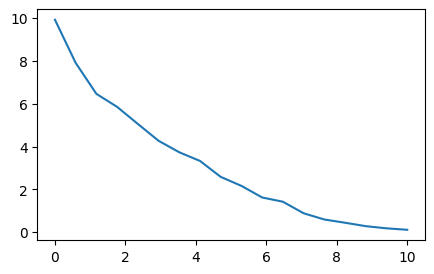

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

def plot_losses(epochs_seen, tokens_seen, train_losses, val_losses):
    fig, ax1 = plt.subplots(figsize=(5, 3))

    # Plot training and validation loss against epochs
    ax1.plot(epochs_seen, train_losses, label="Training loss")
    ax1.plot(epochs_seen, val_losses, linestyle="-.", label="Validation loss")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Loss")
    ax1.legend(loc="upper right")
    ax1.xaxis.set_major_locator(MaxNLocator(integer=True))  # only show integer labels on x-axis

    # Create a second x-axis for tokens seen
    ax2 = ax1.twiny()  # Create a second x-axis that shares the same y-axis
    ax2.plot(tokens_seen, train_losses, alpha=0)  # Invisible plot for aligning ticks
    ax2.set_xlabel("Tokens seen")

    fig.tight_layout()  # Adjust layout to make room
    plt.savefig("loss-plot.pdf")
    plt.show()

# Example usage:
epochs_tensor = torch.linspace(0, num_epochs, len(train_losses))
plot_losses(epochs_tensor, tokens_seen, train_losses, val_losses)


In [ ]:
model.to("cpu")
model.eval()

GPTModel(
  (tok_emb): Embedding(50257, 768)
  (pos_emb): Embedding(256, 768)
  (drop_emb): Dropout(p=0.1, inplace=False)
  (trf_blocks): Sequential(
    (0): TransformerBlock(
      (attn): MultiHeadAttention(
        (W_query): Linear(in_features=768, out_features=768, bias=False)
        (W_key): Linear(in_features=768, out_features=768, bias=False)
        (W_value): Linear(in_features=768, out_features=768, bias=False)
        (out_proj): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (ff): FeedForward(
        (layers): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU()
          (2): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (drop_shortcut): Dropout(p=0.1, inplace=False)
    )
    (1): TransformerBlock(
      (attn): MultiHeadAttention(
        (W_query): Linear(in_featur

In [ ]:
vocab = {
    "closer": 0,
    "every": 1,
    "effort": 2,
    "forward": 3,
    "inches": 4,
    "moves": 5,
    "pizza": 6,
    "toward": 7,
    "you": 8
}

inverse_vocab = {v: k for k, v in vocab.items()}

In [ ]:
next_token_logits = torch.tensor(
    [4.51, 0.89, -1.90, 6.75, 1.63, -1.62, -1.89, 6.28, 1.79]
)


In [ ]:
probas = torch.softmax(next_token_logits, dim=0)
print(probas)

next_token_id = probas.argmax(probas).item()
print(next_token_id)
print(inverse_vocab[next_token_id])

tensor([6.0907e-02, 1.6313e-03, 1.0019e-04, 5.7212e-01, 3.4190e-03, 1.3257e-04,
        1.0120e-04, 3.5758e-01, 4.0122e-03])


TypeError: argmax(): argument 'dim' (position 1) must be int, not Tensor

to implement a probabilistic sampling process, we will replace the softmax with the multinomial function

In [ ]:
torch.manual_seed(123)
next_token_id = torch.multinomial(probas, num_samples =1).item()
print(inverse_vocab[next_token_id])

toward


to see the effect of the multinomial function lets repeat the implementation for 1000 times

In [ ]:
def print_sampled_tokens(probas):
    torch.manual_seed(123)  # Manual seed for reproducibility
    sample = [torch.multinomial(probas, num_samples=1).item() for i in range(1000)]
    sampled_ids = torch.bincount(torch.tensor(sample))
    for i, freq in enumerate(sampled_ids):
        print(f"{freq} × {inverse_vocab[i]}")

print_sampled_tokens(probas)


71 × closer
2 × every
0 × effort
544 × forward
2 × inches
1 × moves
0 × pizza
376 × toward
4 × you


In [ ]:
def softmax_with_temperature(logits, temperature):
    scaled_logits = logits / temperature
    return torch.softmax(scaled_logits, dim=0)

# Temperature values
temperatures = [1, 0.1, 5] # Original, higher confidence, and lower confidence

# Calculate scaled probabilities
scaled_probas = [softmax_with_temperature(next_token_logits, T) for T in temperatures]

NameError: name 'temperatures' is not defined

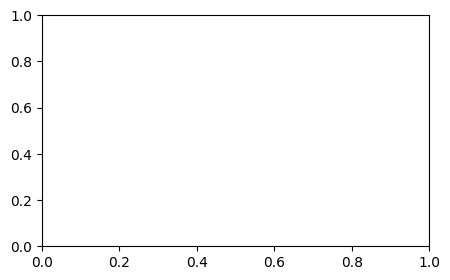

In [ ]:
x = torch.arange(len(vocab))
bar_width = 0.15

fig, ax = plt.subplots(figsize=(5, 3))
for i, T in enumerate(temperatures):
    rects = ax.bar(x + i * bar_width, scaled_probas[i], bar_width, label=f'Temperature = {T}')

ax.set_ylabel('Probability')
ax.set_xticks(x)
ax.set_xticklabels(vocab.keys(), rotation=90)
ax.legend()

plt.tight_layout()
plt.savefig("temperature_plot.pdf")
plt.show()

In [ ]:
next_token_logits2 = next_token_logits / 0.1
print(torch.softmax(next_token_logits2, dim=0))

tensor([1.8530e-10, 3.5189e-26, 2.6890e-38, 9.9099e-01, 5.7569e-23, 4.4220e-37,
        2.9718e-38, 9.0133e-03, 2.8514e-22])


In [ ]:
next_token_logits2 = next_token_logits / 5
print(torch.softmax(next_token_logits2, dim=0))

tensor([0.1546, 0.0750, 0.0429, 0.2421, 0.0869, 0.0454, 0.0430, 0.2203, 0.0898])


#Top-K Sampling

In [ ]:
top_k = 3
top_logits, top_pos = torch.topk(next_token_logits, top_k)
print("Top logits:", top_logits)
print("Top positions:", top_pos)

Top logits: tensor([6.7500, 6.2800, 4.5100])
Top positions: tensor([3, 7, 0])


In [ ]:
new_logits = torch.where(
    condition=next_token_logits < top_logits[-1],
    input=torch.tensor(float("-inf")),
    other=next_token_logits
)

print(new_logits)

tensor([4.5100,   -inf,   -inf, 6.7500,   -inf,   -inf,   -inf, 6.2800,   -inf])


In [ ]:
topk_probas = torch.softmax(new_logits, dim=0)
print(topk_probas)

tensor([0.0615, 0.0000, 0.0000, 0.5775, 0.0000, 0.0000, 0.0000, 0.3610, 0.0000])


In [ ]:
def generate(model, idx, max_new_tokens, context_size, temperature=0.0, top_k=None, eos_id=None):

    # For-loop is the same as before: Get logits, and only focus on last time step
    for _ in range(max_new_tokens):
        idx_cond = idx[:, -context_size:]
        with torch.no_grad():
            logits = model(idx_cond)
        logits = logits[:, -1, :]

        # New: Filter logits with top_k sampling
        if top_k is not None:
            # Keep only top_k values
            top_logits, _ = torch.topk(logits, top_k)
            min_val = top_logits[:, -1]
            logits = torch.where(logits < min_val, torch.tensor(float("-inf")).to(logits.device), logits)

        # New: Apply temperature scaling
        if temperature > 0.0:
            logits = logits / temperature

            # Apply softmax to get probabilities
            probs = torch.softmax(logits, dim=-1)  # (batch_size, context_len)

            # Sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1)  # (batch_size, 1)

        # Otherwise same as before: get idx of the vocab entry with the highest logits value
        else:
            idx_next = torch.argmax(logits, dim=-1, keepdim=True)  # (batch_size, 1)

        if idx_next == eos_id:  # Stop generating early if end-of-sequence token is encountered and eos_id is specified
            break

        # Same as before: append sampled index to the running sequence
        idx = torch.cat((idx, idx_next), dim=1)  # (batch_size, num_tokens+1)

    return idx

In [ ]:
torch.manual_seed(123)

token_ids = generate(
    model=model,
    idx=text_to_token_ids("Every effort moves you", tokenizer),
    max_new_tokens=15,
    context_size=GPT_CONFIG_124M["context_length"],
    top_k=25,
    temperature=1.4
)

print("Output text:\n", token_ids_to_text(token_ids, tokenizer))

Output text:
 Every effort moves you know began to happen. It was not it was no struck by holding it


#Loading and Saving Model Weights in Pytorch

In [ ]:
model = GPTModel(GPT_CONFIG_124M)
torch.save(model.state_dict(), "model.pth")

In [ ]:
model = GPTModel(GPT_CONFIG_124M)
model.load_state_dict(torch.load("model.pth", weights_only = False))
model.eval()

GPTModel(
  (tok_emb): Embedding(50257, 768)
  (pos_emb): Embedding(256, 768)
  (drop_emb): Dropout(p=0.1, inplace=False)
  (trf_blocks): Sequential(
    (0): TransformerBlock(
      (attn): MultiHeadAttention(
        (W_query): Linear(in_features=768, out_features=768, bias=False)
        (W_key): Linear(in_features=768, out_features=768, bias=False)
        (W_value): Linear(in_features=768, out_features=768, bias=False)
        (out_proj): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (ff): FeedForward(
        (layers): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU()
          (2): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (drop_shortcut): Dropout(p=0.1, inplace=False)
    )
    (1): TransformerBlock(
      (attn): MultiHeadAttention(
        (W_query): Linear(in_featur

saving the optimizer too bro!

In [ ]:
optimizer = torch.optim.AdamW(model.parameters(), lr=0.0004, weight_decay =0.1)

torch.save({
    "model_state_dict": model.state_dict(),
    "optimizer_state_dict": optimizer.state_dict(),
    },
    "model_and_optimizer.pth"
)

In [ ]:
checkpoint = torch.load("model_and_optimizer.pth")
model = GPTModel(GPT_CONFIG_124M)
model.load_state_dict(checkpoint["model_state_dict"])
optimizer = torch.optim.AdamW(model.parameters(), lr=0.0004, weight_decay =0.1)
optimizer.load_state_dict(checkpoint["optimizer_state_dict"])
model.train()

GPTModel(
  (tok_emb): Embedding(50257, 768)
  (pos_emb): Embedding(256, 768)
  (drop_emb): Dropout(p=0.1, inplace=False)
  (trf_blocks): Sequential(
    (0): TransformerBlock(
      (attn): MultiHeadAttention(
        (W_query): Linear(in_features=768, out_features=768, bias=False)
        (W_key): Linear(in_features=768, out_features=768, bias=False)
        (W_value): Linear(in_features=768, out_features=768, bias=False)
        (out_proj): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (ff): FeedForward(
        (layers): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU()
          (2): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (drop_shortcut): Dropout(p=0.1, inplace=False)
    )
    (1): TransformerBlock(
      (attn): MultiHeadAttention(
        (W_query): Linear(in_featur